In [1]:
from keras.layers import SimpleRNN, Embedding
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Like all recurrent layers in Keras, SimpleRNN can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape (batch_size, timesteps, output_features)), or it can return only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)).

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
# stacking
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


# Simple RNN - IMDB

In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    verbose = 2,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
26s - loss: 0.6343 - acc: 0.6345 - val_loss: 0.5239 - val_acc: 0.7830
Epoch 2/10
25s - loss: 0.4042 - acc: 0.8317 - val_loss: 0.4477 - val_acc: 0.7986
Epoch 3/10
25s - loss: 0.2905 - acc: 0.8853 - val_loss: 0.4197 - val_acc: 0.8286
Epoch 4/10
25s - loss: 0.2162 - acc: 0.9183 - val_loss: 0.4382 - val_acc: 0.8268
Epoch 5/10
25s - loss: 0.1494 - acc: 0.9444 - val_loss: 0.5231 - val_acc: 0.7930
Epoch 6/10
25s - loss: 0.1011 - acc: 0.9655 - val_loss: 0.4832 - val_acc: 0.8266
Epoch 7/10
25s - loss: 0.0654 - acc: 0.9781 - val_loss: 0.5393 - val_acc: 0.8286
Epoch 8/10
25s - loss: 0.0472 - acc: 0.9864 - val_loss: 0.6121 - val_acc: 0.8176
Epoch 9/10
25s - loss: 0.0281 - acc: 0.9917 - val_loss: 0.6630 - val_acc: 0.7992
Epoch 10/10
25s - loss: 0.0205 - acc: 0.9933 - val_loss: 0.7012 - val_acc: 0.8082


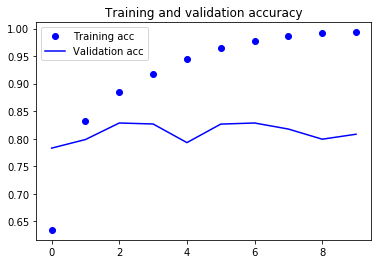

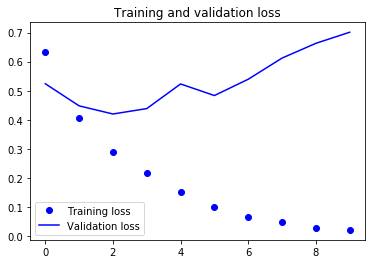

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# A concrete LSTM example in Keras

In [8]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    verbose = 2,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
157s - loss: 0.5114 - acc: 0.7595 - val_loss: 0.3433 - val_acc: 0.8684
Epoch 2/10
157s - loss: 0.2910 - acc: 0.8862 - val_loss: 0.2960 - val_acc: 0.8844
Epoch 3/10
156s - loss: 0.2374 - acc: 0.9097 - val_loss: 0.5494 - val_acc: 0.7826
Epoch 4/10
156s - loss: 0.1998 - acc: 0.9259 - val_loss: 0.8228 - val_acc: 0.7928
Epoch 5/10
156s - loss: 0.1770 - acc: 0.9361 - val_loss: 0.3355 - val_acc: 0.8590
Epoch 6/10
153s - loss: 0.1598 - acc: 0.9437 - val_loss: 0.3726 - val_acc: 0.8768
Epoch 7/10
151s - loss: 0.1522 - acc: 0.9461 - val_loss: 0.3175 - val_acc: 0.8676
Epoch 8/10
147s - loss: 0.1340 - acc: 0.9525 - val_loss: 0.4264 - val_acc: 0.8350
Epoch 9/10
147s - loss: 0.1187 - acc: 0.9596 - val_loss: 0.3536 - val_acc: 0.8560
Epoch 10/10
147s - loss: 0.1174 - acc: 0.9583 - val_loss: 0.7403 - val_acc: 0.8248


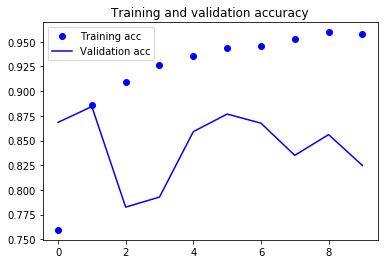

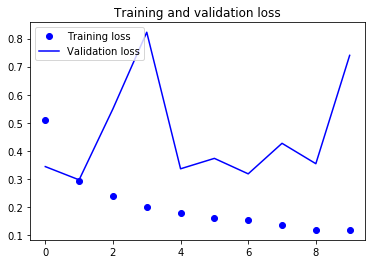

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()